<a href="https://colab.research.google.com/github/JonRivera/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












**PROBLEM 1**

In [292]:
df0 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df0.shape

(80053, 27)

In [294]:
df0.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
#Get percent votes and use them in the x axis -> ex) rating 10 got 33.6 %
#x axis will corespond to number of votes
#x=range(1,11)
#y=df0
#df0.shape
#We are interested in columns 18:27 inclusively
#We are interested in row1
#convert row 1 into tidy data format

df3= df0.iloc[0,17:]


In [0]:
df3 = df3.reset_index()

In [297]:
# renaming columns
df3 = df3.rename(columns={'index': 'Rating', 0:'Percents'})
df3

def pct_to_number(pct):
  return float(pct)
df3['Percents']=df3['Percents'].apply(pct_to_number)
df3['Percents'].dtype

#I can use df1 to make a very specific graph

dtype('float64')

In [298]:
df3

,Rating,Percents
0,1_pct,49.0
1,2_pct,1.7
2,3_pct,1.7
3,4_pct,0.7
4,5_pct,1.7
5,6_pct,1.7
6,7_pct,2.7
7,8_pct,2.0
8,9_pct,5.0
9,10_pct,33.6


In [0]:
df3=df3.drop('Rating',axis=1)

In [0]:
df4= df3['Percents']
#df2 to  get a 1 dimensional array


In [303]:
df4.shape

(10,)

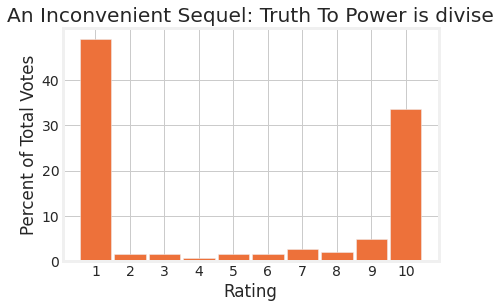

In [306]:
#Guided by lecture notes I was able to simply plug my data from d4 into
#bar plot in matplotlib

#style sheet
plt.style.use('fivethirtyeight')

# create fig and ax variable
fig, ax = plt.subplots()

#white figure background
fig.set_facecolor('white')

#put bars on th eplot
ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height = df4, color ='#ED713A', width=.91)

#10 bars so you need 10 values
# x axis

#white axes background
ax.set_facecolor('white')
#x axis
ax.set_xticks(range(1,11,1))
ax.set_xticklabels(range(1,11,1))

#y axis
ax.set_yticks(range(0,41,10))
ax.set_yticklabels(range(0,41,10))

#axis titles
ax.set_xlabel('Rating')
ax.set_ylabel('Percent of Total Votes')

ax.set_title('An Inconvenient Sequel:' +' Truth To Power is divise')
plt.show()



**PROBLEM 2**

In [0]:

# Post can be found https://projects.fivethirtyeight.com/clinton-trump-hip-hop-lyrics/

import pandas as pd
#obtain data from fivethirtyeight, link below
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/hip-hop-candidate-lyrics/genius_hip_hop_lyrics.csv", encoding = "ISO-8859-1")
#had difficulties loading files because of encoding
#so encoding was changed



In [0]:
df

In [280]:
#Make a column that groups candidates and album release dates into # of mentions 
# for a given year
df2= df.groupby(["candidate", "album_release_date"]).size().reset_index(name='mentions')
print(df2)

#I reverted column and row display settings back to normal
#I set limits of rows and columns to None so I could see all the indexes 

          candidate  album_release_date  mentions
0        Ben Carson                2011         1
1    Bernie Sanders                2015         2
2    Chris Christie                2014         1
3    Chris Christie                2016         1
4      Donald Trump                1989         3
5      Donald Trump                1990         2
6      Donald Trump                1991         2
7      Donald Trump                1992         4
8      Donald Trump                1993         1
9      Donald Trump                1994         3
10     Donald Trump                1995         4
11     Donald Trump                1996         3
12     Donald Trump                1997         2
13     Donald Trump                1998         7
14     Donald Trump                1999         6
15     Donald Trump                2000         9
16     Donald Trump                2001         3
17     Donald Trump                2002         9
18     Donald Trump                2003         4


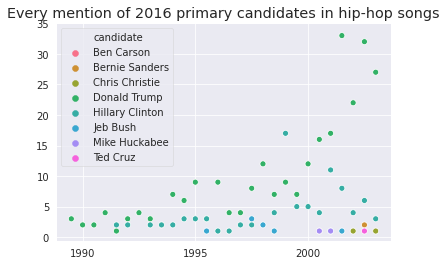

In [281]:
#Alot of trial and error and researching in the web, while comparing with lecture notes
#I eventually realize that I can make a nice scatter plot with seaborn
#And Use Matplotlib for extra control
#Still don't know how to change hues based on preference
#Seaborn randomizes the color??? or is there some parameter I am unaware off?


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import seaborn as sns



# ax.set_xticks & ax.set_ylabel gives control of the x axis and y axis
ax =sns.scatterplot(x="album_release_date", y="mentions", data=df2,hue="candidate",units=1)
ax.set_xticks(range(1990,2020,10))
ax.set_xticklabels(range(1990,2020,5))

ax.set_yticks(range(0,40,5))
ax.set_yticklabels(range(0,40,5))
# The picture doesn't really have x and y labels , they are implied
# y axis corresponds to mentions
# x axis corresponds to album_release_date
#Note: Trupms and Clinton's hue look very similar so they might look like
#Same mentions if you don't look closely - don't know how to change hue directly

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Every mention of 2016 primary candidates in hip-hop songs')
plt.show()

In [0]:
#Final Notes for PROBLEM2
#Initial thought process was to create and superimpose 8 scatter plots with different colors
#The scatter plots were going to compare two different album release date vs mentions
# of candidate
#I would begin by making 8 different data frames of candidates
#ex C1 = df2[(df2["candidate"] == "Ben Carson")], C2= ...
#Then somehow I would merge all 8 scatter plots
#Realize eventually this is too tedious, and didn't really found a way to merge all




# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here